### DHO Monte Carlo Simulation

<br>**Author(s):** Weixiang Yu
<br>**Last run:** 07-31-20
<br>**Short description:** This notebook will try to do a Monte Carlo simulation to determine the allow parameter space of DHO given that the maximum observed variability from AGNs is 0.35 mag. 

In [1]:
# import basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os, sys

# see if local stores mpl style, else use from src
try:
    plt.style.use('yu_basic')
except:
    mpl.rc_file('https://raw.githubusercontent.com/ywx649999311/project_template'
                '/master/%7B%7Bcookiecutter.project_name%7D%7D/src/vis/mpl/yu_basic.rc')

pd.set_option('display.max_columns', 999)
%matplotlib inline

In [2]:
# import CARMA celerite term
from agntk.carma.CARMATerm import *
from agntk.lc.utils import *
from celerite import GP
from scipy.optimize import minimize

### 1. Simulate DHO params with large boundary

In [50]:
a1 = np.exp(np.random.uniform(-50, 50, 100000))
a2 = np.exp(np.random.uniform(-100, 100, 100000))
b0 = np.exp(np.random.uniform(-30, 10, 100000))
b1 = np.exp(np.random.uniform(-30, 10, 100000))
amp = np.sqrt((b1**2*a2 + b0**2)/(2*a1*a2)) # compute amplitude
tau_blue = b1/b0

# mask out combinations that give amp > 0.4
mask = ((amp > 0.35) | (amp < 0.0001)) | (tau_blue < 0.01) | (tau_blue > 1000) 

Text(0, 0.5, 'b1')

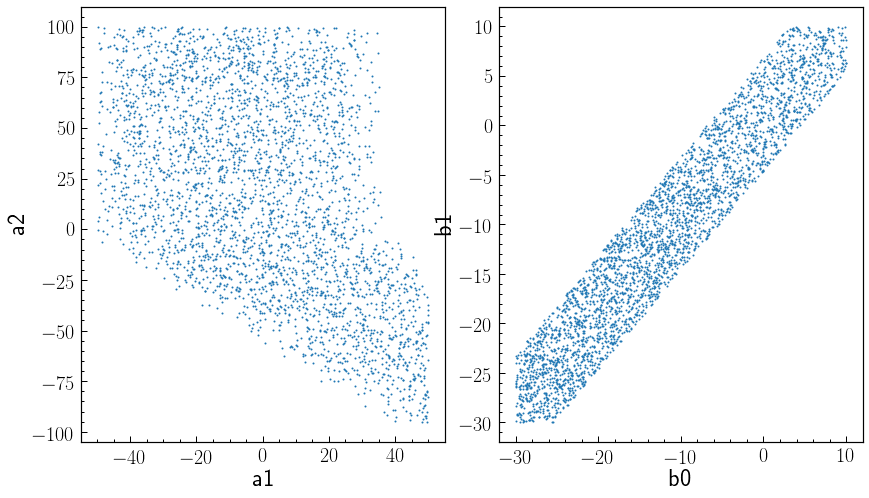

In [51]:
# plot the distribution parameters in the log space
fig, axs = plt.subplots(1,2, figsize=(14,8))
axs[0].scatter(np.log(a1[~mask]), np.log(a2[~mask]), s=1)
axs[0].set_xlabel('a1')
axs[0].set_ylabel('a2')

axs[1].scatter(np.log(b0[~mask]), np.log(b1[~mask]), s=1)
axs[1].set_xlabel('b0')
axs[1].set_ylabel('b1')

<span style='color:red'> __Conclusion:__ </span> After some testing, it seems like that there is no tight regions can be found by just limiting the maximum amplitude and some intuitive timescales.